(a) Plot this data to see what it looks like.

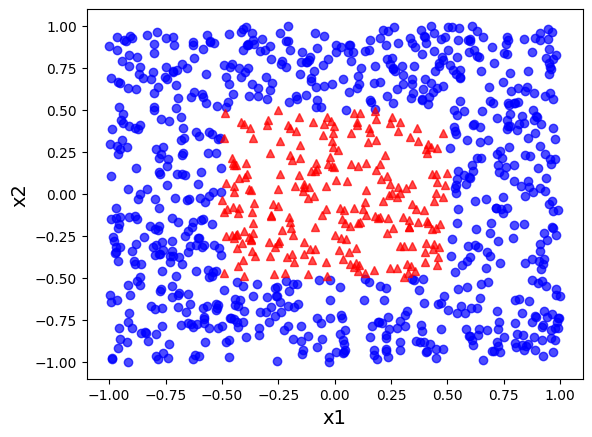

In [8]:
import numpy as np
import matplotlib.pyplot as plt

data = np.loadtxt('mini-data.txt')

X = data[:,:-1]
y = data[:,-1:].ravel()

x0_min, x0_max = -1.1, 1.1
x1_min, x1_max = -1.1, 1.1

plt.plot(X[y==0,0], X[y==0,1], 'bo', alpha=0.7)
plt.plot(X[y==1,0], X[y==1,1], 'r^', alpha=0.7)
plt.xlabel('x1', fontsize=14)
plt.ylabel('x2', fontsize=14)

plt.xlim(x0_min, x0_max)
plt.ylim(x1_min, x1_max)
plt.show()

b) Use `sklearn.tree.DecisionTreeClassifier` to fit a decision tree to the data. What stopping criterion did you use?

In [9]:
from sklearn.tree import DecisionTreeClassifier

# Stopping criteron: max_depth = 4
clf = DecisionTreeClassifier(random_state=42, max_depth = 4).fit(X, y)

(c) Display the tree using `sklearn.tree.plot_tree`.

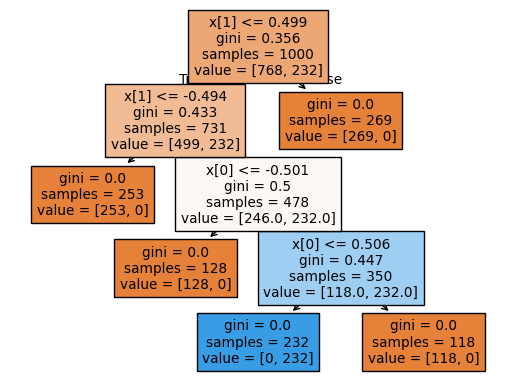

In [10]:
# sklearn's own plot_tree seems easier to use than graphviz 

from sklearn import tree

tree.plot_tree(clf, filled=True)
plt.show()

(d) Fit boosted decision stumps to this data using `sklearn.ensemble.AdaBoostClassifier`. Use a
relatively small number of stumps, and display each of them.

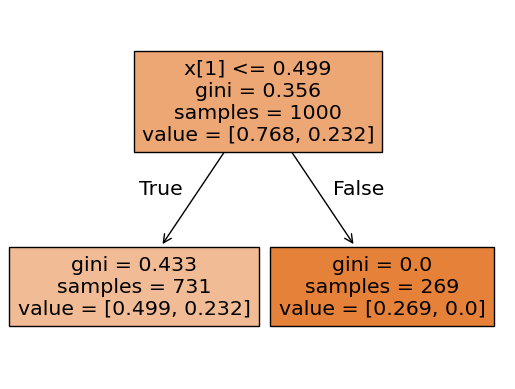

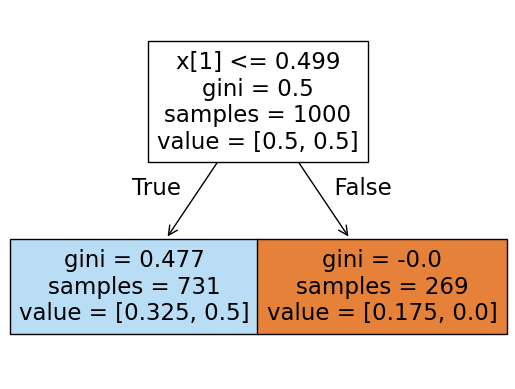

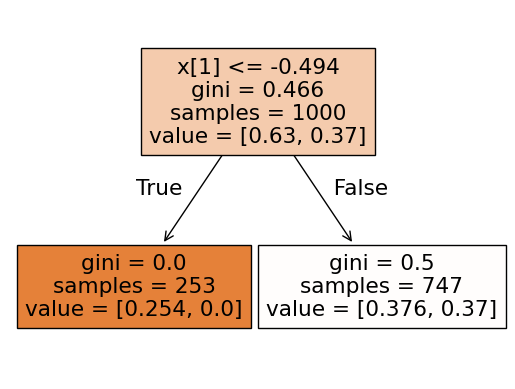

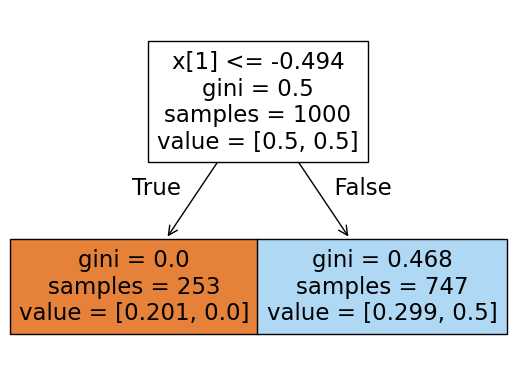

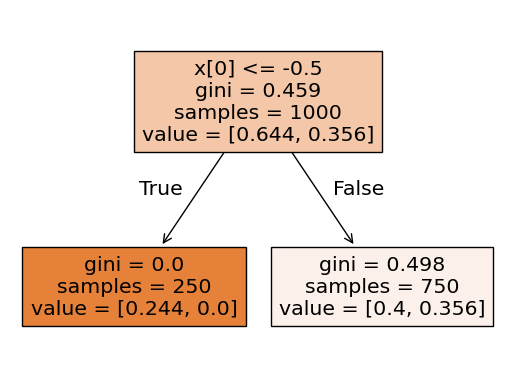

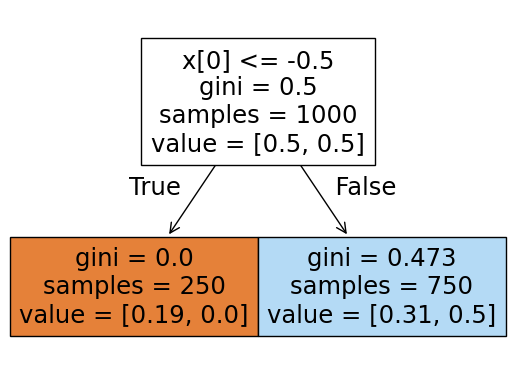

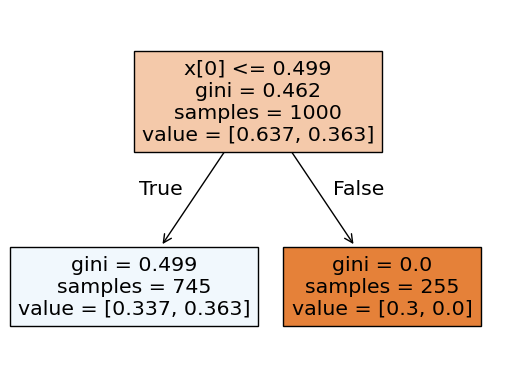

In [13]:
from sklearn.ensemble import AdaBoostClassifier

ensemble = AdaBoostClassifier(n_estimators=7, random_state=42).fit(X, y)
clfs = ensemble.estimators_

for clf in clfs:    
    tree.plot_tree(clf, filled=True)
    plt.show()

(e) Give a table showing how accuracy on the training data improves as each successive stump is added.

In [14]:
from sklearn.metrics import accuracy_score
import pandas as pd

scores = []

staged_y_pred = ensemble.staged_predict(X)
for i, y_pred in enumerate(staged_y_pred):
    scores.append(
        {
            '# Stumps': i+1,
            'Accuracy': accuracy_score(y, y_pred)
        }
    )

scores_df = pd.DataFrame(scores)
print(scores_df.to_string(index=False))

 # Stumps  Accuracy
        1     0.768
        2     0.768
        3     0.768
        4     0.768
        5     0.768
        6     0.882
        7     1.000


In [6]:
s = ensemble.staged_score(X,y)

In [7]:
for i in s:
    print(i)

0.768
0.768
0.768
0.768
0.768
